In [1]:
#  imports 
import numpy as np
import pandas as pd
from math import sqrt 
from pprint import pprint
from numpy import array
from time import time

In [2]:
# load data
df=pd.read_csv('Cardiotocography_02_v10.csv')  

del df['id']
del df['Unnamed: 0']
df['outlier'] = df.outlier.apply(lambda label: 1 if label == "'yes'" else 0)

df.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,outlier
0,146.0,0.0,0.0,5.0,65.0,0.4,33.0,7.4,0.0,0.0,...,134.0,164.0,1.0,0.0,150.0,149.0,151.0,1.0,0.0,1
1,128.0,0.0,0.0,2.0,86.0,0.3,79.0,2.9,0.0,0.0,...,114.0,130.0,0.0,0.0,128.0,126.0,129.0,0.0,1.0,1
2,149.0,0.0,0.0,5.0,61.0,0.4,34.0,5.6,0.0,0.0,...,148.0,160.0,1.0,0.0,154.0,153.0,155.0,0.0,0.0,1
3,122.0,0.0,0.0,0.0,83.0,0.5,6.0,15.6,0.0,0.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,1
4,134.0,0.0,4.0,0.0,79.0,0.2,42.0,5.5,0.0,0.0,...,128.0,145.0,2.0,0.0,135.0,135.0,136.0,1.0,0.0,1


In [3]:
df.shape

(1688, 22)

In [4]:
# df to values
df = df.values

In [5]:
# Deep ExtraTrees
import argparse
import numpy as np
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/Cardiotocography.json")  
gc = GCForest(config)

In [11]:
# train test
from sklearn.cross_validation import train_test_split
y = df[:,21]
X = df[:,0:21]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
# count class
len(np.unique(y_train))

2

In [8]:
  # X_enc is the concatenated predict_proba result of CascadeExtraTrees

X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
  

[ 2018-07-28 11:49:40,600][cascade_classifier.fit_transform] X_groups_train.shape=[(1181, 21)],y_train.shape=(1181,),X_groups_test.shape=[(507, 21)],y_test.shape=(507,)
[ 2018-07-28 11:49:40,601][cascade_classifier.fit_transform] group_dims=[21]
[ 2018-07-28 11:49:40,603][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-28 11:49:40,604][cascade_classifier.fit_transform] group_ends=[21]
[ 2018-07-28 11:49:40,605][cascade_classifier.fit_transform] X_train.shape=(1181, 21),X_test.shape=(507, 21)
[ 2018-07-28 11:49:40,606][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(1181, 21), X_cur_test.shape=(507, 21)
[ 2018-07-28 11:49:41,252][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 11:49:42,134][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 11:49:43,006][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_

In [10]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-28 11:51:01,245][cascade_classifier.transform] X_groups_test.shape=[(507, 21)]
[ 2018-07-28 11:51:01,247][cascade_classifier.transform] group_dims=[21]
[ 2018-07-28 11:51:01,248][cascade_classifier.transform] X_test.shape=(507, 21)
[ 2018-07-28 11:51:01,249][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(507, 21)


Test Accuracy of CascadeExtraTrees = 97.633136 %
[[494   0]
 [ 12   1]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.08      0.14        13

avg / total       0.98      0.98      0.97       507



In [12]:
#  predict_proba + Data 
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-28 11:51:17,741][cascade_classifier.transform] X_groups_test.shape=[(507, 21)]
[ 2018-07-28 11:51:17,742][cascade_classifier.transform] group_dims=[21]
[ 2018-07-28 11:51:17,743][cascade_classifier.transform] X_test.shape=(507, 21)
[ 2018-07-28 11:51:17,744][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(507, 21)


In [13]:
# New data
X_train_new = X_train_enc
X_test_new  = X_test_enc

In [14]:
X_test_new.shape

(507, 23)

In [15]:
X_train_new.shape

(1181, 23)

In [16]:
# CascadeExtraTrees
config = load_json("./examples/Cardiotocographygc.json")  
gc = GCForest(config)

X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-28 11:51:18,815][cascade_classifier.fit_transform] X_groups_train.shape=[(1181, 23)],y_train.shape=(1181,),X_groups_test.shape=[(507, 23)],y_test.shape=(507,)
[ 2018-07-28 11:51:18,816][cascade_classifier.fit_transform] group_dims=[23]
[ 2018-07-28 11:51:18,817][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-28 11:51:18,818][cascade_classifier.fit_transform] group_ends=[23]
[ 2018-07-28 11:51:18,819][cascade_classifier.fit_transform] X_train.shape=(1181, 23),X_test.shape=(507, 23)
[ 2018-07-28 11:51:18,820][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(1181, 23), X_cur_test.shape=(507, 23)
[ 2018-07-28 11:51:19,319][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 11:51:19,910][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 11:51:20,499][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_

In [17]:
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-28 11:51:44,259][cascade_classifier.transform] X_groups_test.shape=[(507, 23)]
[ 2018-07-28 11:51:44,261][cascade_classifier.transform] group_dims=[23]
[ 2018-07-28 11:51:44,262][cascade_classifier.transform] X_test.shape=(507, 23)
[ 2018-07-28 11:51:44,263][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(507, 23)


Test Accuracy of CascadeExtraTrees = 97.830375 %
[[494   0]
 [ 11   2]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.15      0.27        13

avg / total       0.98      0.98      0.97       507



In [18]:
# CascadeExtraTrees
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))   
    
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    
    config = load_json("./examples/Cardiotocographygc.json")  
    gc = GCForest(config)
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test) 
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")  

[ 2018-07-28 11:51:45,346][cascade_classifier.fit_transform] X_groups_train.shape=[(1181, 23)],y_train.shape=(1181,),X_groups_test.shape=[(507, 23)],y_test.shape=(507,)
[ 2018-07-28 11:51:45,348][cascade_classifier.fit_transform] group_dims=[23]
[ 2018-07-28 11:51:45,348][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-28 11:51:45,349][cascade_classifier.fit_transform] group_ends=[23]
[ 2018-07-28 11:51:45,350][cascade_classifier.fit_transform] X_train.shape=(1181, 23),X_test.shape=(507, 23)
[ 2018-07-28 11:51:45,351][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(1181, 23), X_cur_test.shape=(507, 23)
[ 2018-07-28 11:51:45,846][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.16%
[ 2018-07-28 11:51:46,434][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 11:51:47,026][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_

[ 2018-07-28 11:52:10,875][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=99.15%
[ 2018-07-28 11:52:11,466][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 11:52:12,059][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=99.15%
[ 2018-07-28 11:52:12,651][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=98.31%
[ 2018-07-28 11:52:13,237][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 11:52:13,829][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:52:14,417][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=99.15%
[ 2018-07-28 11:52:15,013][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.31%


('Test Accuracy of CascadeExtraTrees = 97.830375 %', 'Layer :', 0)
[[494   0]
 [ 11   2]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.15      0.27        13

avg / total       0.98      0.98      0.97       507

(' Time ', '30.375', ' seconds')


[ 2018-07-28 11:52:18,428][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 11:52:19,024][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 11:52:19,615][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 11:52:20,205][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.15%
[ 2018-07-28 11:52:20,796][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.31%
[ 2018-07-28 11:52:21,393][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 11:52:21,983][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:52:22,573][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.31%


[ 2018-07-28 11:52:46,766][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:52:47,364][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.31%
[ 2018-07-28 11:52:48,113][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.31%
[ 2018-07-28 11:52:48,961][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.31%
[ 2018-07-28 11:52:49,179][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.56%
[ 2018-07-28 11:52:49,181][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.83%
[ 2018-07-28 11:52:49,182][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.56%
[ 2018-07-28 11:52:49,184][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.83%
[ 2018-07-28 11:52:49,185][

('Test Accuracy of CascadeExtraTrees = 97.830375 %', 'Layer :', 1)
[[494   0]
 [ 11   2]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.15      0.27        13

avg / total       0.98      0.98      0.97       507

(' Time ', '31.266', ' seconds')


[ 2018-07-28 11:52:53,516][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.16%
[ 2018-07-28 11:52:54,116][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 11:52:54,709][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 11:52:55,299][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.15%
[ 2018-07-28 11:52:55,892][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.15%
[ 2018-07-28 11:52:56,480][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 11:52:57,068][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:52:57,657][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.31%


[ 2018-07-28 11:53:18,281][cascade_classifier.fit_transform] X_train.shape=(1181, 23),X_test.shape=(507, 23)
[ 2018-07-28 11:53:18,282][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(1181, 23), X_cur_test.shape=(507, 23)


('Test Accuracy of CascadeExtraTrees = 97.830375 %', 'Layer :', 2)
[[494   0]
 [ 11   2]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.15      0.27        13

avg / total       0.98      0.98      0.97       507

(' Time ', '24.214', ' seconds')


[ 2018-07-28 11:53:18,775][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 11:53:19,371][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 11:53:20,114][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 11:53:20,705][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.31%
[ 2018-07-28 11:53:21,303][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.15%
[ 2018-07-28 11:53:21,893][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 11:53:22,481][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:53:23,071][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.46%


[ 2018-07-28 11:53:48,033][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:53:48,623][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.31%
[ 2018-07-28 11:53:49,218][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.31%
[ 2018-07-28 11:53:49,845][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.31%
[ 2018-07-28 11:53:49,949][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.56%
[ 2018-07-28 11:53:49,950][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.63%
[ 2018-07-28 11:53:49,951][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.56%
[ 2018-07-28 11:53:49,952][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.63%
[ 2018-07-28 11:53:49,953][

('Test Accuracy of CascadeExtraTrees = 97.633136 %', 'Layer :', 3)
[[494   0]
 [ 12   1]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.08      0.14        13

avg / total       0.98      0.98      0.97       507

(' Time ', '37.984', ' seconds')


[ 2018-07-28 11:54:00,147][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 11:54:00,852][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 11:54:01,442][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 11:54:02,032][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.15%
[ 2018-07-28 11:54:02,622][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.31%
[ 2018-07-28 11:54:03,214][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 11:54:03,805][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:54:04,405][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.46%


[ 2018-07-28 11:54:27,765][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:54:28,365][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.46%
[ 2018-07-28 11:54:29,123][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.31%
[ 2018-07-28 11:54:29,712][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=99.15%
[ 2018-07-28 11:54:29,815][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.56%
[ 2018-07-28 11:54:29,816][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.83%
[ 2018-07-28 11:54:29,817][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.56%
[ 2018-07-28 11:54:29,818][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.83%
[ 2018-07-28 11:54:29,819][

('Test Accuracy of CascadeExtraTrees = 97.830375 %', 'Layer :', 4)
[[494   0]
 [ 11   2]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.15      0.27        13

avg / total       0.98      0.98      0.97       507

(' Time ', '36.121', ' seconds')


[ 2018-07-28 11:54:39,890][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 11:54:40,483][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 11:54:41,193][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 11:54:42,228][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.31%
[ 2018-07-28 11:54:43,077][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.31%
[ 2018-07-28 11:54:44,093][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 11:54:44,813][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:54:45,406][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.46%


[ 2018-07-28 11:55:09,139][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:55:09,738][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.31%
[ 2018-07-28 11:55:10,324][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.31%
[ 2018-07-28 11:55:11,029][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.31%
[ 2018-07-28 11:55:11,134][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.48%
[ 2018-07-28 11:55:11,135][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.63%
[ 2018-07-28 11:55:11,136][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.48%
[ 2018-07-28 11:55:11,137][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.63%
[ 2018-07-28 11:55:11,138][

('Test Accuracy of CascadeExtraTrees = 97.830375 %', 'Layer :', 5)
[[494   0]
 [ 11   2]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.15      0.27        13

avg / total       0.98      0.98      0.97       507

(' Time ', '38.047', ' seconds')


[ 2018-07-28 11:55:21,314][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 11:55:21,906][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 11:55:22,494][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 11:55:23,090][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.31%
[ 2018-07-28 11:55:23,686][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.31%
[ 2018-07-28 11:55:24,275][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 11:55:24,863][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:55:25,459][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.46%


[ 2018-07-28 11:55:51,444][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:55:52,154][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.31%
[ 2018-07-28 11:55:52,743][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.31%
[ 2018-07-28 11:55:53,463][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.31%
[ 2018-07-28 11:55:53,568][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.48%
[ 2018-07-28 11:55:53,569][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.63%
[ 2018-07-28 11:55:53,571][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.48%
[ 2018-07-28 11:55:53,572][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.63%
[ 2018-07-28 11:55:53,573][

('Test Accuracy of CascadeExtraTrees = 97.830375 %', 'Layer :', 6)
[[494   0]
 [ 11   2]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.15      0.27        13

avg / total       0.98      0.98      0.97       507

(' Time ', '32.762', ' seconds')


[ 2018-07-28 11:55:56,273][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 11:55:56,865][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 11:55:57,455][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 11:55:58,051][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.31%
[ 2018-07-28 11:55:58,638][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.31%
[ 2018-07-28 11:55:59,225][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 11:55:59,821][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:56:00,451][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.46%


[ 2018-07-28 11:56:23,881][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:56:24,474][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.46%
[ 2018-07-28 11:56:25,071][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.31%
[ 2018-07-28 11:56:25,659][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.31%
[ 2018-07-28 11:56:25,766][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.48%
[ 2018-07-28 11:56:25,767][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.83%
[ 2018-07-28 11:56:25,768][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.48%
[ 2018-07-28 11:56:25,769][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.83%
[ 2018-07-28 11:56:25,770][

('Test Accuracy of CascadeExtraTrees = 97.830375 %', 'Layer :', 7)
[[494   0]
 [ 11   2]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.15      0.27        13

avg / total       0.98      0.98      0.97       507

(' Time ', '35.947', ' seconds')


[ 2018-07-28 11:56:35,354][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 11:56:35,940][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 11:56:36,532][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 11:56:37,120][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.15%
[ 2018-07-28 11:56:37,715][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.31%
[ 2018-07-28 11:56:38,347][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 11:56:38,940][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:56:39,751][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.46%


[ 2018-07-28 11:57:04,176][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:57:04,782][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.46%
[ 2018-07-28 11:57:05,376][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.31%
[ 2018-07-28 11:57:05,967][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.31%
[ 2018-07-28 11:57:06,072][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.39%
[ 2018-07-28 11:57:06,073][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.63%
[ 2018-07-28 11:57:06,074][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.39%
[ 2018-07-28 11:57:06,076][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.63%
[ 2018-07-28 11:57:06,077][

('Test Accuracy of CascadeExtraTrees = 97.830375 %', 'Layer :', 8)
[[494   0]
 [ 11   2]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.15      0.27        13

avg / total       0.98      0.98      0.97       507

(' Time ', '43.423', ' seconds')


[ 2018-07-28 11:57:23,165][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 11:57:23,752][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 11:57:24,345][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 11:57:24,938][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.31%
[ 2018-07-28 11:57:25,526][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.31%
[ 2018-07-28 11:57:26,117][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 11:57:26,855][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:57:27,455][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.46%


[ 2018-07-28 11:57:52,168][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:57:52,758][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.31%
[ 2018-07-28 11:57:53,347][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.31%
[ 2018-07-28 11:57:53,938][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.31%
[ 2018-07-28 11:57:54,161][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.48%
[ 2018-07-28 11:57:54,162][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=98.03%
[ 2018-07-28 11:57:54,164][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.48%
[ 2018-07-28 11:57:54,168][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=98.03%
[ 2018-07-28 11:57:54,169][

[ 2018-07-28 11:58:18,098][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=98.22%
[ 2018-07-28 11:58:18,099][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=97.63%
[ 2018-07-28 11:58:18,100][cascade_classifier.fit_transform] [Result][Optimal Level Detected] opt_layer_num=6, accuracy_train=98.56%, accuracy_test=98.03%
[ 2018-07-28 11:58:18,105][cascade_classifier.transform] X_groups_test.shape=[(507, 23)]
[ 2018-07-28 11:58:18,107][cascade_classifier.transform] group_dims=[23]
[ 2018-07-28 11:58:18,108][cascade_classifier.transform] X_test.shape=(507, 23)
[ 2018-07-28 11:58:18,109][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(507, 23)
[ 2018-07-28 11:58:19,375][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(507, 25)
[ 2018-07-28 11:58:20,418][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(507, 25)
[ 2018-07-28 11:58:21,453][cascade_classifier

('Test Accuracy of CascadeExtraTrees = 98.027613 %', 'Layer :', 9)
[[494   0]
 [ 10   3]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.23      0.38        13

avg / total       0.98      0.98      0.97       507

(' Time ', '55.441', ' seconds')


[ 2018-07-28 11:58:25,071][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 11:58:25,661][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 11:58:26,396][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 11:58:26,982][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.31%
[ 2018-07-28 11:58:27,569][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.15%
[ 2018-07-28 11:58:28,169][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 11:58:28,759][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:58:29,351][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.31%


[ 2018-07-28 11:58:55,845][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:58:56,437][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.31%
[ 2018-07-28 11:58:57,025][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.31%
[ 2018-07-28 11:58:57,612][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.31%
[ 2018-07-28 11:58:57,717][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.65%
[ 2018-07-28 11:58:57,718][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.63%
[ 2018-07-28 11:58:57,719][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.65%
[ 2018-07-28 11:58:57,720][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.63%
[ 2018-07-28 11:58:57,721][

('Test Accuracy of CascadeExtraTrees = 97.633136 %', 'Layer :', 10)
[[494   0]
 [ 12   1]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.08      0.14        13

avg / total       0.98      0.98      0.97       507

(' Time ', '51.451', ' seconds')


[ 2018-07-28 11:59:21,972][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 11:59:22,562][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 11:59:23,153][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 11:59:23,788][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.15%
[ 2018-07-28 11:59:24,380][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.31%
[ 2018-07-28 11:59:24,972][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 11:59:25,561][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:59:26,155][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.31%


[ 2018-07-28 11:59:47,741][cascade_classifier.fit_transform] X_train.shape=(1181, 23),X_test.shape=(507, 23)
[ 2018-07-28 11:59:47,742][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(1181, 23), X_cur_test.shape=(507, 23)


('Test Accuracy of CascadeExtraTrees = 97.633136 %', 'Layer :', 11)
[[494   0]
 [ 12   1]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.08      0.14        13

avg / total       0.98      0.98      0.97       507

(' Time ', '25.106', ' seconds')


[ 2018-07-28 11:59:48,248][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 11:59:48,845][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 11:59:49,587][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 11:59:50,174][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.15%
[ 2018-07-28 11:59:50,816][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.15%
[ 2018-07-28 11:59:51,414][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 11:59:52,006][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 11:59:52,596][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.31%


[ 2018-07-28 12:00:13,051][cascade_classifier.fit_transform] X_train.shape=(1181, 23),X_test.shape=(507, 23)
[ 2018-07-28 12:00:13,053][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(1181, 23), X_cur_test.shape=(507, 23)


('Test Accuracy of CascadeExtraTrees = 97.633136 %', 'Layer :', 12)
[[494   0]
 [ 12   1]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.08      0.14        13

avg / total       0.98      0.98      0.97       507

(' Time ', '24.26', ' seconds')


[ 2018-07-28 12:00:13,542][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 12:00:14,134][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 12:00:14,724][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 12:00:15,316][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.31%
[ 2018-07-28 12:00:15,908][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.15%
[ 2018-07-28 12:00:16,500][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 12:00:17,097][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 12:00:17,833][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.31%


[ 2018-07-28 12:00:38,315][cascade_classifier.fit_transform] X_train.shape=(1181, 23),X_test.shape=(507, 23)
[ 2018-07-28 12:00:38,316][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(1181, 23), X_cur_test.shape=(507, 23)


('Test Accuracy of CascadeExtraTrees = 97.633136 %', 'Layer :', 13)
[[494   0]
 [ 12   1]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.08      0.14        13

avg / total       0.98      0.98      0.97       507

(' Time ', '24.228', ' seconds')


[ 2018-07-28 12:00:38,799][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 12:00:39,512][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 12:00:40,108][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 12:00:40,701][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.31%
[ 2018-07-28 12:00:41,413][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.15%
[ 2018-07-28 12:00:42,127][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 12:00:42,955][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 12:00:43,671][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.31%


[ 2018-07-28 12:01:04,962][cascade_classifier.fit_transform] X_train.shape=(1181, 23),X_test.shape=(507, 23)
[ 2018-07-28 12:01:04,963][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(1181, 23), X_cur_test.shape=(507, 23)


('Test Accuracy of CascadeExtraTrees = 97.633136 %', 'Layer :', 14)
[[494   0]
 [ 12   1]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.08      0.14        13

avg / total       0.98      0.98      0.97       507

(' Time ', '25.604', ' seconds')


[ 2018-07-28 12:01:05,455][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 12:01:06,046][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 12:01:06,641][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 12:01:07,378][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.31%
[ 2018-07-28 12:01:07,971][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.31%
[ 2018-07-28 12:01:08,563][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 12:01:09,150][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 12:01:09,742][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.46%


[ 2018-07-28 12:01:33,082][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 12:01:33,678][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.31%
[ 2018-07-28 12:01:34,265][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.31%
[ 2018-07-28 12:01:34,862][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.31%
[ 2018-07-28 12:01:34,967][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.48%
[ 2018-07-28 12:01:34,967][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.63%
[ 2018-07-28 12:01:34,968][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.48%
[ 2018-07-28 12:01:34,969][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.63%
[ 2018-07-28 12:01:34,970][

('Test Accuracy of CascadeExtraTrees = 97.830375 %', 'Layer :', 15)
[[494   0]
 [ 11   2]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.15      0.27        13

avg / total       0.98      0.98      0.97       507

(' Time ', '30.019', ' seconds')


[ 2018-07-28 12:01:37,698][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 12:01:38,299][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 12:01:38,887][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 12:01:39,602][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.31%
[ 2018-07-28 12:01:40,316][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.31%
[ 2018-07-28 12:01:41,028][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 12:01:41,615][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 12:01:42,330][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.31%


[ 2018-07-28 12:02:08,399][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 12:02:08,987][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.31%
[ 2018-07-28 12:02:09,585][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.31%
[ 2018-07-28 12:02:10,175][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.31%
[ 2018-07-28 12:02:10,280][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.48%
[ 2018-07-28 12:02:10,281][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.63%
[ 2018-07-28 12:02:10,282][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.48%
[ 2018-07-28 12:02:10,283][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.63%
[ 2018-07-28 12:02:10,283][

('Test Accuracy of CascadeExtraTrees = 97.633136 %', 'Layer :', 16)
[[494   0]
 [ 12   1]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.08      0.14        13

avg / total       0.98      0.98      0.97       507

(' Time ', '33.09', ' seconds')


[ 2018-07-28 12:02:13,086][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 12:02:13,678][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.46%
[ 2018-07-28 12:02:14,267][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.31%
[ 2018-07-28 12:02:14,860][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.15%
[ 2018-07-28 12:02:15,452][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.15%
[ 2018-07-28 12:02:16,041][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 12:02:16,639][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 12:02:17,235][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.31%


[ 2018-07-28 12:02:41,000][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 12:02:41,596][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.31%
[ 2018-07-28 12:02:42,315][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.31%
[ 2018-07-28 12:02:43,026][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.31%
[ 2018-07-28 12:02:43,253][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.65%
[ 2018-07-28 12:02:43,254][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.83%
[ 2018-07-28 12:02:43,255][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.65%
[ 2018-07-28 12:02:43,256][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.83%
[ 2018-07-28 12:02:43,257][

('Test Accuracy of CascadeExtraTrees = 97.830375 %', 'Layer :', 17)
[[494   0]
 [ 11   2]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.15      0.27        13

avg / total       0.98      0.98      0.97       507

(' Time ', '43.363', ' seconds')


[ 2018-07-28 12:03:01,015][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 12:03:01,603][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.46%
[ 2018-07-28 12:03:02,194][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.15%
[ 2018-07-28 12:03:02,782][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.15%
[ 2018-07-28 12:03:03,372][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.15%
[ 2018-07-28 12:03:03,967][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 12:03:04,601][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 12:03:05,199][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.31%


[ 2018-07-28 12:03:28,646][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 12:03:29,247][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.31%
[ 2018-07-28 12:03:29,842][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.31%
[ 2018-07-28 12:03:30,435][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.31%
[ 2018-07-28 12:03:30,540][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.73%
[ 2018-07-28 12:03:30,541][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.83%
[ 2018-07-28 12:03:30,542][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.73%
[ 2018-07-28 12:03:30,543][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.83%
[ 2018-07-28 12:03:30,544][

('Test Accuracy of CascadeExtraTrees = 97.830375 %', 'Layer :', 18)
[[494   0]
 [ 11   2]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.15      0.27        13

avg / total       0.98      0.98      0.97       507

(' Time ', '30.028', ' seconds')


[ 2018-07-28 12:03:33,124][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 12:03:33,716][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.31%
[ 2018-07-28 12:03:34,307][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.15%
[ 2018-07-28 12:03:34,902][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.15%
[ 2018-07-28 12:03:35,496][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.15%
[ 2018-07-28 12:03:36,090][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.31%
[ 2018-07-28 12:03:36,821][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 12:03:37,417][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.31%


[ 2018-07-28 12:04:01,950][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.31%
[ 2018-07-28 12:04:02,549][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.31%
[ 2018-07-28 12:04:03,143][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.31%
[ 2018-07-28 12:04:03,734][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.31%
[ 2018-07-28 12:04:03,837][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.73%
[ 2018-07-28 12:04:03,839][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.83%
[ 2018-07-28 12:04:03,840][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.73%
[ 2018-07-28 12:04:03,841][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.83%
[ 2018-07-28 12:04:03,841][

('Test Accuracy of CascadeExtraTrees = 97.830375 %', 'Layer :', 19)
[[494   0]
 [ 11   2]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       494
        1.0       1.00      0.15      0.27        13

avg / total       0.98      0.98      0.97       507

(' Time ', '31.216', ' seconds')


('Opt_Cascade_num =', 9, ' Accuracy =', 98.03, 'Time =', 365.58000000000004)


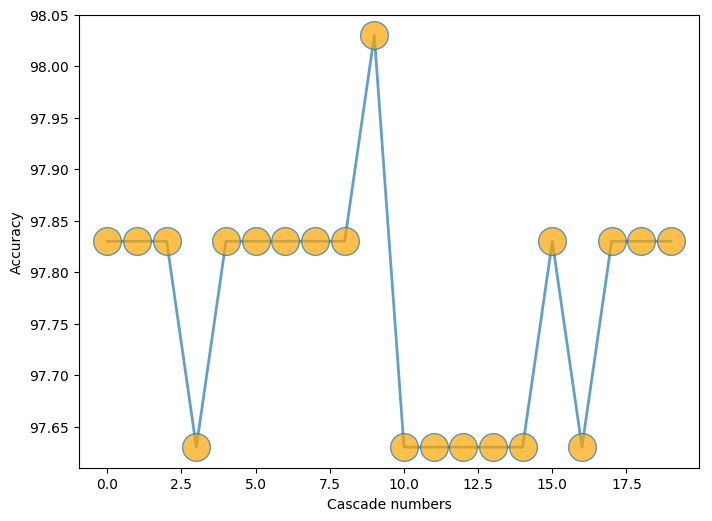

In [19]:
print ("Opt_Cascade_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Cascade numbers')
plt.show()

In [20]:
Accuracy

[97.83,
 97.83,
 97.83,
 97.63,
 97.83,
 97.83,
 97.83,
 97.83,
 97.83,
 98.03,
 97.63,
 97.63,
 97.63,
 97.63,
 97.63,
 97.83,
 97.63,
 97.83,
 97.83,
 97.83]